## Vibrational Energy & Wavefunctions
<br>
Given a diatomic potential computed by some means, such as through Hartree-Fock or RKR, it is possible to use a basis of linearly independent functions to compute the vibrational energy levels of the molecule, as well as compute the wavefunctions themselves that govern the molecule per quantum physics.
<br><br>
In this notebook, the RKR method will be used to generate the potential for $\text{CO}$. Once the potential is fitted and created, an Extended Rydberg Potential is fitted to the RKR potential that allows for a continous function to represent the potential.
<br><br>
The Schrödinger equation of the form $\hat{H}\Psi = E\Psi$ is used for this calculation. The wavefunction $\Psi$ will be represented by a linear combination of basis functions from the basis set, which in this case will be Harmonic Oscillators represented by $\psi_i$. The above equation can be represented as an eigenvalue problem where the vibrational energy levels are repersented by $E$, the eigenvalues. $\hat{H}$ represents the Hamiltonian operator, which when acts upon the wavefunction and returns the energy, $E$. 
$$\hat{H} = \hat{V} + \hat{T}$$
The potential energy $V(r)$ is defined as:
$$V(r) = \int_0^{\infty}{\psi_iR(r)\psi_j dr}$$
Where $R(r)$ is the potential energy surface represented through the Extended Rydberg Potential.
<br>The kinetic energy $T(r)$ is represented as:
$$T(r) = \int_0^{\infty}{\psi_i\frac{-\hbar^2}{2m}\frac{\partial^2}{\partial r^2}\psi_j dr}$$
As can be seen, two different basis functions are used for the equations for $V(r)$ and $T(r)$. This is because the basis set is of some integer size, for example, 10 or 22, and each the equations for $T$ and $V$ are evaluated for each possible combination of basis functions. This results in $H$ being a square matrix with a size of $Basis Size \times Basis Size$
<br><br>
Once $\hat{H}$ has been computed, the eigenvalues of the hamiltonian are computed, which are the vibrational energy states of the system and are graphed alongside the potential energy curve. The wavefunctions for the diatomic potential are computed from the eigenvectors of $\hat{H}$, with each vector representing the set of coefficents for the basis that will produce one wavefunction for the system. The wavefunction will have an energy determined by the coresponding eigenvalue. 
<br><br>
The overall steps for this procedure are listed here: 
<ol>
  <li>Input Diatomic Potential Data.</li>
  <li>Fit the data to a potential function, such as the Extended Rydberg Potential</li>
  <li>Choose a basis set and a size to represent $\Psi$</li>
  <li>Compute the $T(r)$ Matrix</li>
  <li>Compute the $V(r)$ Matrix</li>
  <li>Add $T$ and $V$ to compute $\hat{H}$</li>
  <li>Compute the eigen system for $\hat{H}$, where the eigenvalues are the vibrational energy levels for the molecule and the the eigenvectors the wavefunction coefficients.
</ol>
This notebook uses wavenumbers for energy, angstroms for distance, and atomic units for mass.
All information in this notebook orginates from the following <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hamil.html">website</a>, and from the <i>Franck-Condon Calculations</i> and <i>Diatomic Molecule</i> Matematica Notebooks provided by Dr. Jerry LaRue of Chapman University. 

In [1]:
import sys
sys.path.append("..\\Comp_Chem_Package")

import time
import numpy as np
from tqdm import tqdm
from scipy.linalg import eigh
from scipy.misc import derivative as ddx
from scipy.integrate import quad as integrate
from diatomicConstants import diatomicConstants

#Set up Graphing Abillties with Plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
figure = {
   "data":[],
   "layout":{
       "xaxis":{"title":"Bond Distance in Angstroms"},
       "yaxis":{"title":"Energy in Wavenumbers"}
   }
}

#Actually NOX
#CO = diatomicConstants("gound", 0, 1904.2, 14.075, 0, 0, 1.67195, 0.0171, 0, 0.54*pow(10,-6), 1.15077, 14*16/(14+16))           

#NOA 
#CO = diatomicConstants(state="ground", T=43965.7, w=2374.31, wx=10.106, wy=-0.0465, wz=0, B=1.9965, a=0.01915, y=0, D=5.4*pow(10, -6), re=1.06434, u=(14*16)/(14+16))    


#Actually H2
#CO = diatomicConstants(state="ground", T=0, w=4401.21, wx=121.33, wy=0, wz=0, B=60.853, a=3.062, y=0, D=0.0471, re=0.74144, u=0.5)    

#CO = diatomicConstants("A", 65075.7, 1518.28, 19.4, 0, 0, 1.6115, 0.02325, 0, 0.00000733, 1.2353, (12*16) / (12+16)) 

#CO = diatomicConstants(T=0, re=1.128323, w=2169.81358, wx=13.28831, wy=0, wz=0, B=1.93128087, a=0.01750441, y=0, 
#      D=0, u = (12*16) / (12+16), state="ground")
#diatomicConstants(T=0, re=0.74144 , w=4401.21, wx=121.33, wy=0, wz=0, B=60.853, a=3.062, 
      #                     y=0, D=0.0471, u=0.5, state="ground") 
#CO = diatomicConstants(T=65075.7, re=1.2353, w=1518.28, wx=19.4, wy=0, wz=0, B=1.6115, a=0.02325, y=0, 
#      D=0.00000733, u = (12*16) / (12+16), state="A")   
#Used to time effiency of the code

#CO

CO = diatomicConstants(
    name="H2", state="X", T=0, re=0.74144, w=4401.21, wx=121.33, wy=0, wz=0, B=60.853, a=3.062, y=0, D=0.0471, u=0.503912516115 )

#NOA
#'''
#CO = diatomicConstants(
#    "CO", "ground", T=43965.7, re=1.06434, w=2374.31, wx=10.106, wy=-0.0465, wz=0, B=1.9965, a=0.01915, 
#        y=0, D=5.4*pow(10, -6), u=(14*15.994)/(14+15.994)
#)
#'''

startTime = time.time()

  0%|▏                                                                             | 23/12507 [00:00<00:56, 221.15it/s]


Generating RKR Potential


  2%|█▍                                                                           | 224/12507 [00:01<01:11, 170.94it/s]..\Comp_Chem_Package\Zrkr_old.py:93: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

  2%|█▍                                                                           | 224/12507 [00:01<01:09, 176.24it/s]


Plotting Figure


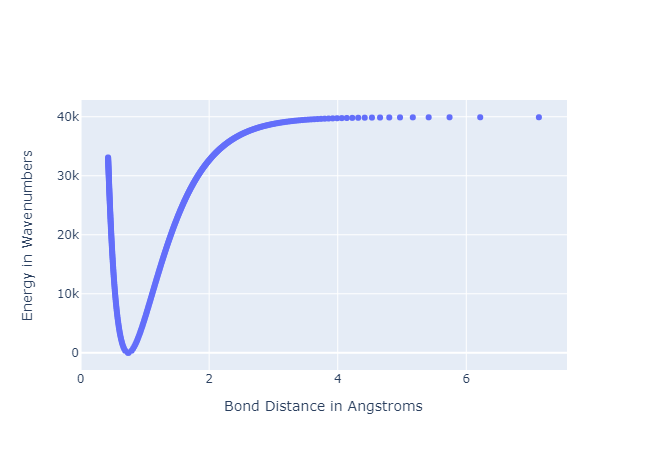

In [2]:
#Step 1, Input the Diatomic Potential Data
#For the purposes of this notebook, the potential will be computed using RKR,
#but the use of Hartree-Fock, DFT or other theories will work as well
#The Diatomic Potential is for COX, and the diatomic constants are from the NIST Webbook
from Zrkr_old import rkr

rkr = rkr()

#RKR Values for CO
rkr.setDiatomicConstants(CO)

x, y = rkr.graphData(resolution=.08)

#x = x[:len(x) - 2]
#y = y[:len(y) - 2]

#Manually Add in Minimum Data point which is not computed by the RKR
#x.append(1.128323)
#y.append(0)

#x.append( (x[0] + x[1]) / 2)
#y.append(0)

figure["data"].append(
    {
        "type":"scatter",
        "x":x,
        "y":y,
        "connectgaps":True,
        "mode":"markers",
        "name":"RKR Potential"
    }
)

print("Plotting Figure")
iplot(figure)

Plotting Figure


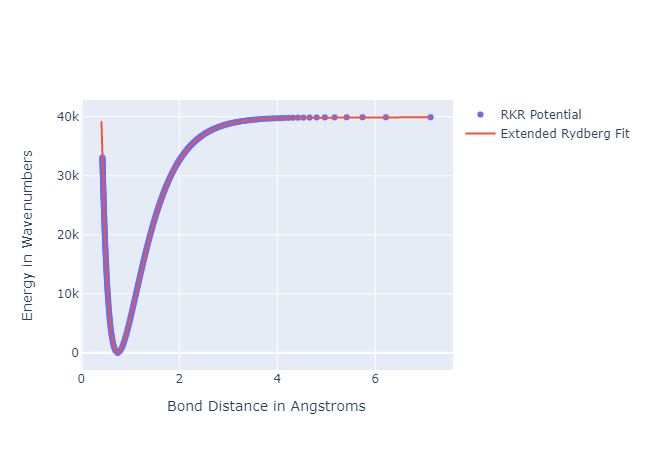

In [3]:
#Step 2, Fit the Data to a Potential Energy Functoin 
#In this case, the Extended Rydberg Potential will be used
from ZdiatomicPotentials_Old import morsePotential as extendedRydberg
R = extendedRydberg()

R.fitPotential(x, y, True)

#Should the Optimal Bond Distance point be zeroed?
R.zeroRe = True

#R.a1 = 3.92873
#R.a2 = 2.39717
#R.a3 = 1.92242

xr, yr = R.graphData(min(x)-.02, max(x))

figure["data"].append(
    {
        "x":xr,
        "y":yr,
        "name":"Extended Rydberg Fit"
    }
)

print("Plotting Figure")
iplot(figure)

0


 31%|████████████████████████▍                                                     | 157/500 [00:00<00:00, 1539.22it/s]

1
Graphing Data


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1461.92it/s]


Orthonormality


HTMLMath(value="<font size='5'> $\\quad\\quad\\quad\\: \\psi_0\\quad\\: \\psi_1\\quad\\: \\psi_2$<br>$\\quad \…

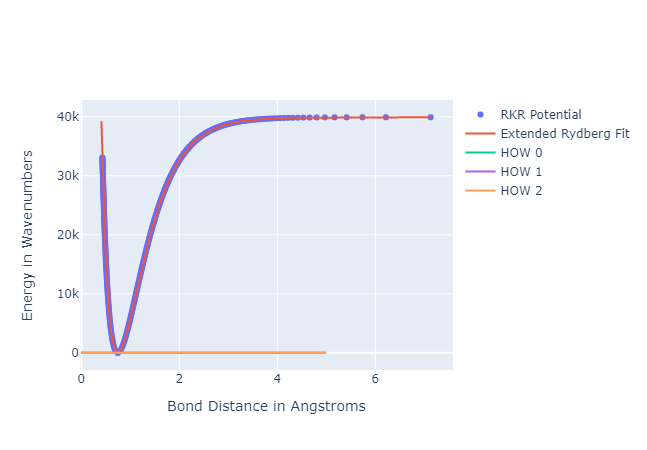

In [4]:
#Step 3, Select a Basis Set and Size
#For this notebook, the Harmonic Oscilator Basis Set is used
from Zbasis_sets_old import how

basisSize = 3

print(0)
#Build the Basis Set of the specified size
basis = how(CO.re, CO.w, CO.u, basisSize)
print(1)
x, y = basis.graphData()

for index, yData in enumerate(y):
    figure["data"].append(
        {
            "x":x, 
            "y":yData,
            "name":"HOW " + str(index)
        }
    )
    
print("Orthonormality")
basis.isOrtho(True)
iplot(figure)


## Unit Analysis 
<br>
Below are the unit analyses for the $T(r)$ and $V(r)$ integrals. Since $\hat{H} = T(r) + V(r)$, both $T(r)$ and $V(r)$ must be in the same units of energy, which for this calculation must be wavenumbers.
<br><br>
$$\begin{align}
    T(r) &= \int_0^{\infty}{\psi_i\frac{-\hbar^2}{2m}\frac{\partial^2}{\partial r^2}\psi_j dr} \\
        &= \left[\frac{1}{\sqrt{{\buildrel _{\circ} \over {\mathrm{A}}}}}
            \frac{\left(\frac{kg \cdot m^2}{s}\right)^2}{kg}
            \frac{\frac{1}{\sqrt{{\buildrel _{\circ} \over {\mathrm{A}}}}}}{{\buildrel _{\circ} \over {\mathrm{A}}}^2} 
        \right] 
        \cdot {\buildrel _{\circ} \over {\mathrm{A}}} \\
        &= \left[\frac{1}{\sqrt{{\buildrel _{\circ} \over {\mathrm{A}}}}}
            \frac{\frac{kg^2 \cdot m^4}{s^2}}{kg}
            \frac{1}{\sqrt{{\buildrel _{\circ} \over {\mathrm{A}}}}{\buildrel _{\circ} \over {\mathrm{A}}}^2} 
        \right] 
        \cdot {\buildrel _{\circ} \over {\mathrm{A}}} \\
        &= \left[\frac{1}{{\buildrel _{\circ} \over {\mathrm{A}}}}
            \frac{kg^2 \cdot m^4}{kg \cdot s^2}
            \frac{1}{{\buildrel _{\circ} \over {\mathrm{A}}}^2} 
        \right] 
        \cdot {\buildrel _{\circ} \over {\mathrm{A}}} \\
        &= \frac{1}{{\buildrel _{\circ} \over {\mathrm{A}}}}
            \frac{kg \cdot m^4}{s^2}
            \frac{1}{{\buildrel _{\circ} \over {\mathrm{A}}}}  
        \\
        &= \frac{1}{{\buildrel _{\circ} \over {\mathrm{A}}}^2}
            \frac{kg \cdot m^4}{s^2}  
        \\
         &= \frac{1}{m^2}
            \frac{kg \cdot m^4}{s^2} &&[\mbox{Convert Angstroms to Meters}] 
        \\
        &= \frac{kg \cdot m^2}{s^2} \\
        &= J &&[\mbox{Definitions of Joules}] \\
      T(r)  &= \frac{1}{cm} &&[\mbox{Convert Joules to Wavenumbers}]
\end{align}$$
<br><br>
$$\begin{align}
    V(r) &= \int_0^{\infty}{\psi_i R(r) \psi_j } \\
         &= \left[ \frac{1}{\sqrt{{\buildrel _{\circ} \over {\mathrm{A}}}}} \frac{1}{cm} \frac{1}{\sqrt{{\buildrel _{\circ} \over {\mathrm{A}}}}}\right] \cdot {\buildrel _{\circ} \over {\mathrm{A}}} \\
         &= \left[ \frac{1}{cm}\frac{1}{{\buildrel _{\circ} \over {\mathrm{A}}}}\right] \cdot {\buildrel _{\circ} \over {\mathrm{A}}} \\
     V(r) &= \frac{1}{cm}
\end{align}$$

## Computational Note
<br>
Due to the use of both numerical derivation and integration in a combined fashion, $\int{\frac{d^2}{dx^2}f(x)dx}$, the integrals for the T(r) matrix are extremely slow to compute. 
Fortunately, for the $T(r)$ matrix, there is a much faster analytical method to compute $T$. For pedagogical purposes, both the numerical and analytical approach have been included in this notebook so that both methods can inspected for accuracy and speed. 


In [5]:
#Step 4. Compute the T(r) Matrix
T = np.zeros([basis.size, basis.size])

#From Google
angstromToMeters2 = pow(10, -20)

#From "Introduction To Computational Physical Chemistry" by Joshua Schrier
joulesToWavenumbers = 5.034116 * pow(10, 22)

conversionFactor = joulesToWavenumbers / angstromToMeters2
c0 = -(basis.hbar ** 2) / (2 * basis.u)

print("cf: ", conversionFactor)
print()
print("c0: ", c0)
print("hbar: ", basis.hbar)
print()
print("hbar^2: ", basis.hbar ** 2)
print()
print("test:", (basis.hbar**2) / (2*basis.u))
print()
print("u: ", basis.u)
print()
print("2u: ", 2*basis.u)
print()
print("cf*c0: ", conversionFactor*c0)
for index1 in tqdm(range(basis.size)):
    b1 = basis.basis[index1]
    for index2, b2 in enumerate(basis.basis):

        integrand = lambda r : b1(r) * c0 * conversionFactor * ddx(b2, r, dx=pow(10, -10), n=2)
        T[index1, index2] += round(integrate(integrand, 0, np.inf, limit=200)[0], 10)
        
print(T)




  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

cf:  5.034116e+42

c0:  -0.0000000000000000000000000000000000000000066455097743513558455703171948412298263437309871323561382362602374856881369324609979588868904344162223181034658287775125273650656378773071239720306408799912171961892133085056704491353658350609334439688
hbar:  0.000000000000000000000000000000000105457181764615647199957439915354103303643177579465844620918676692090073059351012694533273640618009636682472773827612400054931640625

hbar^2:  1.1121217185735182989033197809910028329037176715568120670479528698887940172043115937657729435314468986612082330140341226004725252727518911422065601285458723075338326568191506007740624265114755858708437e-68

test: 0.0000000000000000000000000000000000000000066455097743513558455703171948412298263437309871323561382362602374856881369324609979588868904344162223181034658287775125273650656378773071239720306408799912171961892133085056704491353658350609334439688

u:  0.0000000000000000000000000008367467330089575214899136484003593847071084548294766046

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.19s/it]

[[ 1.10030256e+03  0.00000000e+00 -1.55606280e+03]
 [ 0.00000000e+00  3.30090767e+03 -3.00000000e-10]
 [-1.55606280e+03 -3.00000000e-10  5.50151279e+03]]


In [6]:
import sys
sys.path.append("..\\Comp_Chem_Package")

from compChemGlobal import plot

b1 = basis.basis[0]
b2 = basis.basis[0]

trace=plot.graphFunction(lambda r : b1(r) * ddx(b2, r, dx=pow(10, -10), n=2),
                  "Test")
trace2 = plot.graphFunction(b1, "test2")
trace3 = plot.graphFunction(lambda r : b1(r)*b2(r), "test2")
trace4 = plot.graphFunction(lambda r : ddx(b1, r, n=2, dx=pow(10, -10)), "ddx" )
plot.go.FigureWidget(data=[trace, trace2, trace3, trace4])

FigureWidget({
    'data': [{'hoverlabel': {'font': {'size': 16}},
              'hovertemplate': '<b>x = %{x:…

In [7]:
#Analytical Method for computing T

T2 = np.zeros([basis.size, basis.size])

for b1 in range(basis.size):
    for b2 in range(basis.size):
        
        if(b1 == b2):
            t = 2*b1 + 1
        elif(b1 == b2 + 2):
            t = -np.sqrt( b1 * (b1 - 1) )
        elif(b1 == b2 - 2):
            t = -np.sqrt( (b1+1) * (b1+2)  )
        else:
            t = 0
        T2[b1, b2] += t

#Multiply by RKR Omega to have units of 1/cm
#Basis Omega has units of Hertz
#Should divison be by 4 or by 25
T2 *= (CO.w / 4)

print(T2)

[[ 1100.3025         0.         -1556.06271821]
 [    0.          3300.9075         0.        ]
 [-1556.06271821     0.          5501.5125    ]]


In [8]:
#Step 5. Compute the V(r) Matrix
#In order to improve speed of computation, only half the matrix is computed
#due to the the matrix being Hermitan and symettry existing across the diagnoal of the V

V = np.zeros([basis.size, basis.size])

print("Computing V(r)")
for index1 in tqdm(range(basis.size)):
    b1 = basis.basis[index1]
    for index2, b2 in enumerate(basis.basis):
        
        if(index1 > index2):
            V[index1, index2] = V[index2, index1]
            continue
        
        integrand = lambda r : b1(r) * R.equation(r) * b2(r)
        V[index1, index2] += integrate(integrand, 0, np.inf,  epsabs = pow(10, -200), limit = 200)[0]
        
print(V)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Computing V(r)


<ipython-input-8-fc22f8840633>:17: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.43s/it]

[[ 1196.71631679  -692.24078073  1841.25568297]
 [ -692.24078073  3800.08927975 -2060.67119146]
 [ 1841.25568297 -2060.67119146  6854.1673145 ]]


In [9]:
#Step 6. Compute H

H = V + T2

print(H)

[[ 2297.01881679  -692.24078073   285.19296476]
 [ -692.24078073  7100.99677975 -2060.67119146]
 [  285.19296476 -2060.67119146 12355.6798145 ]]


In [10]:
#Step 7. Compute the Eigen System for H
#Overlay the Vibrational Energy Levels and Wavefunctions

ev, evc = eigh(H)
evc = evc.transpose()

In [11]:
#Graph Wavefunctions and Eigenvalues
import color

#Function to build the wavefunction from the evectors 
def waveFunction(r, v, evec, basisFunctions):
    answer = 0
    
    for index, basis in enumerate(basisFunctions):
        answer += evc[v, index] * basis(r)
    
    return float(answer)

x = np.arange(0, 3, .01)
for n in tqdm(range(len(basis.basis))):
    
    lineColor = color.getColor()
    y = [ waveFunction(r, n, evc, basis.basis)*200 + ev[n] for r in x  ]

    figure["data"].append(
        {
            "x":x,
            "y":y,
            "name":"Wavefunction" + str(n),
            "line":{"color":lineColor}
        }
    )
    figure["data"].append(
        {
            "x":x, 
            "y":[ ev[n] ] * len(x),
            "name":"Energy Level: " + str(n), 
            "line":{"dash":"dash", "color":lineColor}
        }
    )
    
iplot(figure)

ModuleNotFoundError: No module named 'color'

In [ ]:
#Wavefunction Energy Accuracy Computation

from ipywidgets import HTMLMath as mathWidget

totalError = 0
mathString = "<font size='5'>Energy Levels</font><br>"
mathString += "<font size='3'>Energy Levels $(n) \qquad$ Energy in $cm^{-1} \qquad$ Difference from Taylor Series Energy <br>"
for n, energy in enumerate(ev):
    
    error = abs(rkr.E(n) - energy) / rkr.E(n) * 100
    totalError += error
    
    mathString += "$\qquad\:" + "{:02d}".format(n) + " \qquad\qquad\quad\;\;\:\;"
    mathString += "{:.2f}".format(round(energy, 2)) + "\qquad\qquad"
    mathString +=  "{:.4f}".format(round( error, 4)) + "$%<br>"

mathString += "</font>"
display(mathWidget(mathString))


print(round(totalError / len(ev), 5))
print(time.time() - startTime)
print(rkr.E(1) + CO.T)

In [ ]:
#Test the Wavefunction Calculation Class
from wavefunction import wavefunction
from diatomicConstants import diatomicConstants

psi = wavefunction(CO, R.equation, basis)

for n in tqdm(range(len(basis.basis))):
    
    lineColor = color.getColor()
    y = [ waveFunction(r, n, evc, basis.basis) for r in x  ]

    figure["data"].append(
        {
            "x":x,
            "y":y,
            "name":"Class Wavefunction" + str(n),
            "line":{"color":lineColor}
        }
    )
    figure["data"].append(
        {
            "x":x, 
            "y":[ ev[n] ] * len(x),
            "name":"Class Wavefunction EL: " + str(n), 
            "line":{"dash":"dash", "color":lineColor}
        }
    )
    
iplot(figure)

In [ ]:
psi.displayEnergy()
rkr.E(0)

print(psi.energies[0] + CO.T)
print(psi.energies[1] + CO.T)

In [ ]:
print(45160.9 - CO.T)
print(47701.4 - CO.T)

In [ ]:
print(psi.energies[0] + CO.T)
print(psi.energies[1] + CO.T)
print()
print(rkr.E(0) + CO.T)
print(rkr.E(1) + CO.T)